In [263]:
# Working library
import pandas as pd 
import numpy as np 
import cufflinks as cf
import plotly.offline
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import seaborn as sns 
sns.set()
import re
import html
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\qg010\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\qg010\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [264]:
#additional libraries
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras import Sequential
from keras.layers import Embedding, Dense, LSTM, Dropout

In [265]:
# System library 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
plotly.offline.init_notebook_mode(connected=True)

## Data Cleaning

The tweets, as given, are not in a form amenable to analysis -- there is too much ‘noise’. Therefore, the first step is to “clean” the data. Design a procedure that prepares the Twitter data for analysis by satisfying the requirements below.<br>
o All html tags and attributes (i.e., /<[^>]+>/) are removed.<br>
o Html character codes (i.e., &...;) are replaced with an ASCII equivalent.<br>
o All URLs are removed.<br>
o All characters in the text are in lowercase.<br>
o All stop words are removed. Be clear in what you consider as a stop word.<br>
o If a tweet is empty after pre-processing, it should be preserved as such.<br>

In [266]:
# Import stop words from file 
stop1 = open("stop_words.txt","r").read()
stop1=stop1.split('\n')
stop2=stopwords.words('english')
add_stop_words=['rt','lol','ðÿ','ºðÿ','â']
stop_words=stop1+stop2+add_stop_words


In [267]:
stop_words;

In [268]:
pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

In [269]:
sen=pd.read_csv('Sentiment.csv')
elec=pd.read_csv('Canadian_elections_2019.csv')

In [270]:
# sen=sen.iloc[:,::-1]
# elec=elec.iloc[:,::-1]

In [271]:
lemmatizer=WordNetLemmatizer()
def DataClean(x):
    x=str(x)
    #Remove html tags and attributes
    pattern1=re.compile(r'<[^>]+>')
    new=re.sub(pattern1,'',x)
    
    #Replace Html character codes with ASCII equivalent
    new=html.unescape(new)
    
    #Remove URL
    pattern2=re.compile(r'http\S+')
    new=re.sub(pattern2,'',new)
    
    pattern2_2 =re.compile(r'www\.\w+\S+')
    new=re.sub(pattern2_2,'',new)
    
    #Lower characters 
    new=new.lower()
    
    #pattern4=re.compile(r'x[\w]{2,4}')
    #new=re.sub(pattern4,'',new)
        
    #Tokenize tweets
    tokenizer = RegexpTokenizer(r"[\w]+")
    new_ls = tokenizer.tokenize(new)
    
    #Remove bytes type character
    new_ls=[re.sub('^x[\w]{2,5}','',word) for word in new_ls]
    
    #Remove individual numbers 
    #pattern3 =re.compile(r'^\d+\s|\s\d+\s|\s\d+$')
    pattern3 =re.compile(r'^\d+')
    new_ls=[re.sub(pattern3,'',word) for word in new_ls]
    
    #remove stopwords 
    #new_ls=pd.Series(" ".join(word for word in new_ls.split() if word not in stop_words))
    new_ls=[word for word in new_ls if word not in stop_words]
    
    #lemmatization
    new=' '.join(lemmatizer.lemmatize(word) for word in new_ls)
    
    return new
    
    

In [272]:
sen['clean']=sen['text'].apply(DataClean)
elec['clean']=elec['text'].apply(DataClean)

In [273]:
sen.head(20)
elec.head(20)

,sentiment,text,clean
0,Positive,"RT @Diplomtc_Immnty: @realDonaldTrump They tried to take you out &amp; your poll numbers skyrocketed. Voters matter, not @FOXNews moderators.\n#â€¦",diplomtc_immnty realdonaldtrump poll number skyrocketed voter matter foxnews moderator
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the fight i love ufc just no one knows.",chiefy74 damn jealous wanna watch fight love ufc
2,Positive,I'm listening The Beatles now. They're great,listening beatles great
3,Positive,"@ddlovato could i please get a shout out or anything, i'm a huge fan, i can't wait for your new cd",ddlovato shout huge fan wait cd
4,Positive,@salspizza just spotted ur message there Tony and have replied,salspizza spotted ur message tony replied
5,Negative,"finished watching Lost 514.... oh Faraday, pity you.... Eloise Hawking is a cold-hearted b****...",finished watching lost faraday pity eloise hawking cold hearted
6,Positive,Hoping for a nice day today!,hoping nice day today
7,Positive,"@inque54 huy, matulog ka na. hahah. CBroom ain't done yet, but it's taking shape",inque54 huy matulog ka hahah cbroom shape
8,Positive,@GiggyPig you're not the only one who likes deepness,giggypig like deepness
9,Negative,"is at work waiting for shortlisting results and kicking back from the 'hubby', lets see how he likes it!!!",work waiting shortlisting kicking hubby like


,sentiment,negative_reason,text,clean
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, how about we agree that #Canadian #women can not and should not trust that #AndrewScheer and a #Conservatives government will protect a woman's right to have automony over her body. Let's go with that. #cdnpoli #elxn43 #Canada #abortion""",rosiebarton suggestion agree canadian woman trust andrewscheer conservative government protect woman automony body cdnpoli elxn43 canada abortion
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Station \n#EtobicokeNorth #CityofTO #ONPoli #cdnpoli #elxn43 https://t.co/wgdXLksTbQ""",allwomanspacewalk real space_station etobicokenorth cityofto onpoli cdnpoli elxn43
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLION FOR THE NEXT 4 YEARS! ASK JUSTIN! #elxn43 #cdnpoli #Canada https://t.co/9DTLLd9972""",brantford going cost billion year justin elxn43 cdnpoli canada
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#elxn43 \n\nCan't decide? This should help!\n\nhttps://t.co/UNe5J1tDJ6""",canada canadaelection2019 canadavotes elxn43 ncan decide help
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of having their hard earned $ donated to corporate welfare bums that don't need it! This is only one of many reasons #TrudeauMustGo. @SNCLavalin can leave #Canada for all I care. @Sheila_Copps #SNCLavalinScandal #Election2019 #elxn43 #cdnpoli https://t.co/ywD7MAByKk""",canada taxpayer sick tired hard earned donated corporate welfare bum reason trudeaumustgo snclavalin leave canada care sheila_copps snclavalinscandal election2019 elxn43 cdnpoli
5,Negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - #BlastFromThePast - In 2012 #Conservatives introduced the end of the long-gun registry even though all heads of police across Canada and victims' groups objected for crime control and public safety! #GunLobby https://t.co/WgZKMSQ4wa""",canadavotes2019 elxn43 cdnpoli fact blastfromthepast conservative introduced long gun registry head police canada victim group objected crime control public safety gunlobby
6,Positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong hands down has the best election video ever. Please google Rocky Dong boxes socialism if you haven't seen it. Go Rocky! https://t.co/1ruti2ruRZ""",cdnmedia elxn43 cdnpoli ppc rocky dong hand best election video google rocky dong box socialism rocky
7,Positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than double what was promised in 2015, to the national debt. Now for the next term - if re-elected, they're forecasting $90 billion. This is w/out a national pharmacare program incl and w/out an NDP coalition. $180 billion seems possible imo.""",cdnpoli elxn43 liberal double promised national debt term elected forecasting billion national pharmacare program incl ndp coalition billion imo
8,Negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don't Make America's Mistakes | Full Frontal on TBS https://t.co/PhU4jHxnMF via @YouTube""",chooseforward cdnpoli elxn43 ncanada america mistake full frontal tb youtube
9,Negative,Scandal,"b""#CPCKinsellaGate\nLet's see the receipts. Who pays Warren Kinsella to make up sleaze?\n#cdnpoli\n#elxn43 \n#VoteLiberal \xf0\x9f\x87\xa8\xf0\x9f\x87\xa6\n#ChooseForward https://t.co/34ltshteve""",cpckinsellagate nlet receipt pay warren kinsella sleaze cdnpoli elxn43 voteliberal chooseforward


## Exploratory analysis

o Design a simple procedure that determines the political party (Liberal, Conservative, NDP, None) of a given tweet and apply this procedure to all the tweets in the 2019 Canadian elections dataset. A suggestion would be to look at relevant words and hashtags in the tweets that identify to certain political parties. What can you say about the distribution of the political affiliations of the tweets?<br><br>
o Present a graphical figure (e.g. chart, graph, histogram, boxplot, word cloud, etc) that visualizes some aspect of the generic tweets from Sentiment.csv file and another figure for the 2019 Canadian election tweets. All graphs and plots should be readable and have all axes that are appropriately labelled.

### Understand more on both data files

In [274]:
# Create two more columns consisting word length and character length
sen['word_length']=sen['clean'].apply(lambda x:len(x.split()))
sen['charc_length']=sen['clean'].apply(lambda x:len(str(x)))

elec['word_length']=elec['clean'].apply(lambda x:len(x.split()))
elec['charc_length']=elec['clean'].apply(lambda x:len(str(x)))

In [275]:
sen.head()
elec.head()

,sentiment,text,clean,word_length,charc_length
0,Positive,"RT @Diplomtc_Immnty: @realDonaldTrump They tried to take you out &amp; your poll numbers skyrocketed. Voters matter, not @FOXNews moderators.\n#â€¦",diplomtc_immnty realdonaldtrump poll number skyrocketed voter matter foxnews moderator,9,86
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the fight i love ufc just no one knows.",chiefy74 damn jealous wanna watch fight love ufc,8,48
2,Positive,I'm listening The Beatles now. They're great,listening beatles great,3,23
3,Positive,"@ddlovato could i please get a shout out or anything, i'm a huge fan, i can't wait for your new cd",ddlovato shout huge fan wait cd,6,31
4,Positive,@salspizza just spotted ur message there Tony and have replied,salspizza spotted ur message tony replied,6,41


,sentiment,negative_reason,text,clean,word_length,charc_length
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, how about we agree that #Canadian #women can not and should not trust that #AndrewScheer and a #Conservatives government will protect a woman's right to have automony over her body. Let's go with that. #cdnpoli #elxn43 #Canada #abortion""",rosiebarton suggestion agree canadian woman trust andrewscheer conservative government protect woman automony body cdnpoli elxn43 canada abortion,17,145
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Station \n#EtobicokeNorth #CityofTO #ONPoli #cdnpoli #elxn43 https://t.co/wgdXLksTbQ""",allwomanspacewalk real space_station etobicokenorth cityofto onpoli cdnpoli elxn43,8,82
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLION FOR THE NEXT 4 YEARS! ASK JUSTIN! #elxn43 #cdnpoli #Canada https://t.co/9DTLLd9972""",brantford going cost billion year justin elxn43 cdnpoli canada,9,64
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#elxn43 \n\nCan't decide? This should help!\n\nhttps://t.co/UNe5J1tDJ6""",canada canadaelection2019 canadavotes elxn43 ncan decide help,7,61
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of having their hard earned $ donated to corporate welfare bums that don't need it! This is only one of many reasons #TrudeauMustGo. @SNCLavalin can leave #Canada for all I care. @Sheila_Copps #SNCLavalinScandal #Election2019 #elxn43 #cdnpoli https://t.co/ywD7MAByKk""",canada taxpayer sick tired hard earned donated corporate welfare bum reason trudeaumustgo snclavalin leave canada care sheila_copps snclavalinscandal election2019 elxn43 cdnpoli,21,177


In [276]:
# Check most frequent words from sentiment data
bow_sen=sen['clean'].str.cat(sep=' ')
bowls_sen=bow_sen.split()
most_common_words_sen=Counter(bowls_sen).most_common(20)
most_common_words_sen

[('gopdebate', 8939),
 ('day', 8784),
 ('good', 7163),
 ('work', 5749),
 ('today', 5464),
 ('time', 5409),
 ('gopdebates', 5276),
 ('going', 5206),
 ('love', 4767),
 ('night', 4553),
 ('well', 3417),
 ('twitter', 3266),
 ('morning', 3227),
 ('great', 2819),
 ('hope', 2733),
 ('feel', 2709),
 ('tomorrow', 2645),
 ('sleep', 2512),
 ('thing', 2274),
 ('people', 2269)]

In [277]:
# Check most frequent words from election data
bow_elec=elec['clean'].str.cat(sep=' ')
most_common_words_elec=Counter(bow_elec.split()).most_common(20)
most_common_words_elec

[('elxn43', 2120),
 ('cdnpoli', 1158),
 ('vote', 298),
 ('canada', 249),
 ('election', 230),
 ('party', 228),
 ('scheer', 213),
 ('andrewscheer', 196),
 ('trudeau', 194),
 ('conservative', 191),
 ('canadian', 168),
 ('liberal', 165),
 ('chooseforward', 164),
 ('ndp', 163),
 ('cpc', 157),
 ('people', 150),
 ('day', 138),
 ('monday', 135),
 ('justintrudeau', 135),
 ('campaign', 134)]

### Visualization of general sentiment data

In [278]:
sen_hist=sen['sentiment'].value_counts()
sen_hist;

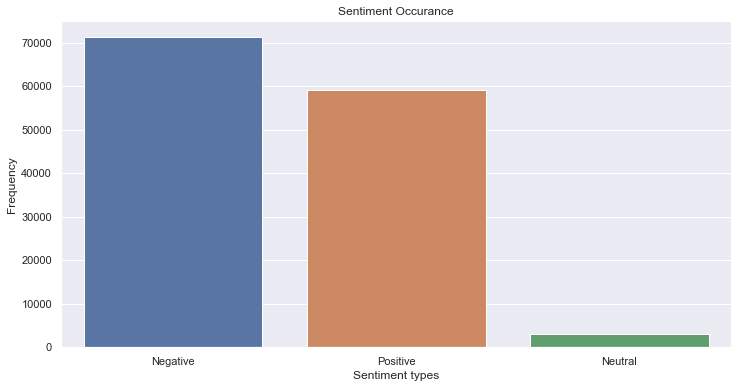

In [279]:
fig = plt.figure(figsize=(12,6))

sns.barplot(x=sen_hist.index,y=sen_hist);
plt.title('Sentiment Occurance');
plt.ylabel('Frequency');
plt.xlabel('Sentiment types');

It is clearly shown from the graph above, negative tweets are more than positive tweets in general. 

Next, check the distribution of word length for each sentiment type.

Text(0.5, 0, 'Word Length')

Text(0.5, 60.650000000000006, 'Word Length')

Text(49.47500000000001, 0.5, 'Counts')

Text(0.5, 60.650000000000006, 'Word Length')

Text(332.00000000000006, 0.5, 'Counts')

Text(0.5, 60.650000000000006, 'Word Length')

Text(590.275, 0.5, 'Counts')

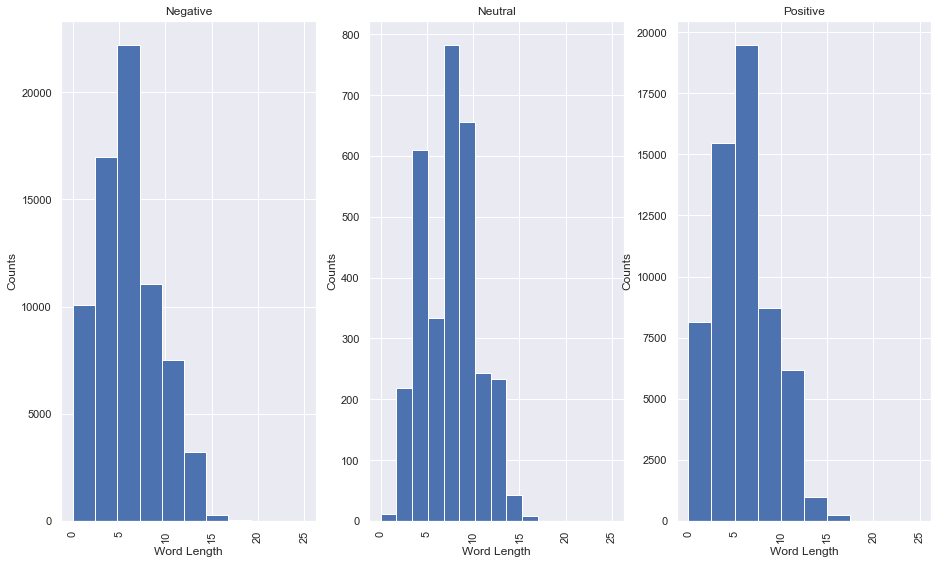

In [280]:
#fig = plt.figure(figsize=(15,8));
wl=sen.hist('word_length',by='sentiment',figsize=(13,8),sharex=True,layout=(1,3));
plt.xlabel('Word Length');
plt.tight_layout();

for ax in wl.flatten():
    ax.set_xlabel("Word Length");
    ax.set_ylabel("Counts");
plt.show()

From the graph above shown, positive and negative tweets don't show significant difference in terms of word length. It is more clear if positive and negative sentiment distribution have been plot into one graph as shown below. Therefore, word length is not a good feature to distinct sentiment in this case so that this feature will not be included into model training. 

In [281]:
#cross_table=pd.crosstab()

(array([5.49686872e-02, 1.04373660e-01, 1.31591297e-01, 5.89389106e-02,
        4.16738408e-02, 6.71832008e-03, 1.61374724e-03, 8.10249658e-05,
        3.37604024e-05, 6.75208048e-06]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 10 Patch objects>)

(array([5.86604693e-02, 9.91382931e-02, 1.29582703e-01, 6.45230162e-02,
        4.38670176e-02, 1.88359840e-02, 1.66251330e-03, 3.73336320e-04,
        1.75001400e-05, 5.83338000e-06]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Distribution for positive and negative sentiment')

Text(0.5, 0, 'Word Length')

Text(0, 0.5, 'Frequency Percentage')

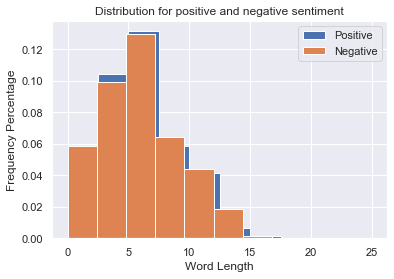

In [282]:
bins=np.linspace(0,25,25)
plt.hist(sen[sen['sentiment']=='Positive']['word_length'],label='Positive',normed=True)
plt.hist(sen[sen['sentiment']=='Negative']['word_length'],label='Negative',normed=True)
plt.title('Distribution for positive and negative sentiment')
plt.xlabel('Word Length')
plt.ylabel('Frequency Percentage')
plt.legend()
plt.show()

In [283]:
#sns.distplot(sen['word_length'],hue='sentiment')

### Visualization of election data 

In [284]:
sen.head();
elec.head();

In [285]:
# Check if there is missing tweets
elec['text'].isna().sum()

0

Design a procedure to classify tweets into different parties based on the number of keys word associated with each party in each tweet. 

In [286]:
Liberal =re.compile(r'(trudeau|justin|justintrudeau|liberal|liberals|chooseforward|vankayak|teamtrudeau|lpc|real change|liberal_party)')
Conservative=re.compile(r"(andrewscheer|andrews|andrewscheer|conservative|stiven|blue|conservatives|cpc|harper|cpc_hq)")
NDP=re.compile(r"(ndp|orange|ptndp|JagmeetSingh|Jagmeet|thejagmeetsingh|Singh|fight)")

def party_clf(x):
    x=str(x)
    party=[]
    
    # check each word if it belongs to any parties 
    for word in x.split():
     ## if word in Liberal :
        if re.findall(Liberal,word):
            party.append('Liberal')   

     ## elif word in Conservative:
        if re.findall(Conservative,word):
            party.append('Conservative')
 
     ## elif word in NDP:
        if re.findall(NDP,word):
            party.append('NDP')
        
     # choose the party appearing the most frequent of this tweet
    if len(party) > 1:
        most_common = max(set(party), key=party.count)
        party = []
        party.append(most_common)
    elif len(party) == 0:
        party.append('None')
        
    return party[0]

            

In [287]:
elec['party']=elec['clean'].apply(party_clf)

In [288]:
elec.head(10);

From the figure below, it indicates that people tend to discuss more about Liberal party following by Conservative and NDP parties, and in fact, Liberal won the election. It might suggest that the party who gain the most attention will win the election. However, more in-depth analysis needs to be done in order to make that conclusion since the there is no significant different in terms of the number of tweets for Liberal and Conservative.

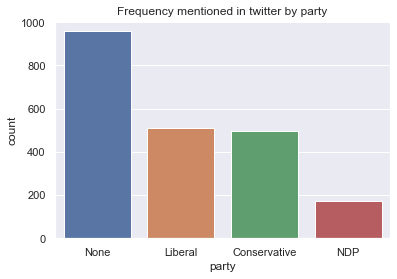

In [289]:
sns.countplot(x='party',data=elec,order=elec['party'].value_counts().index).set_title('Frequency mentioned in twitter by party');

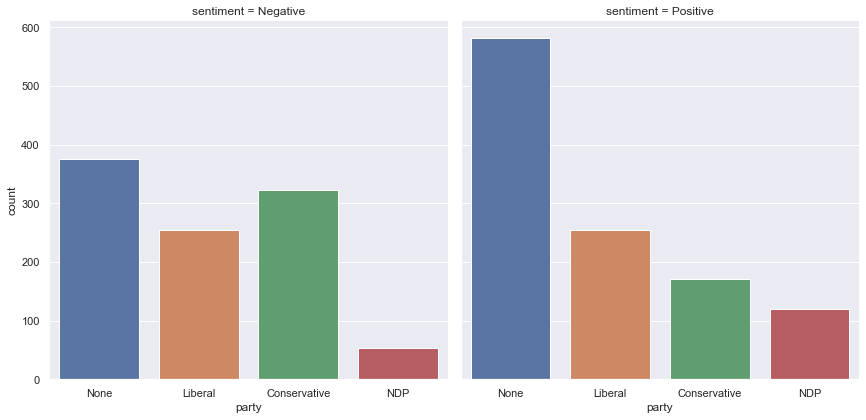

In [290]:
#plt.figure(figsize=(15,8));
sns.catplot(x="party", col="sentiment",
                data=elec, kind="count",
                height=6, aspect=1,order=elec['party'].value_counts().index);


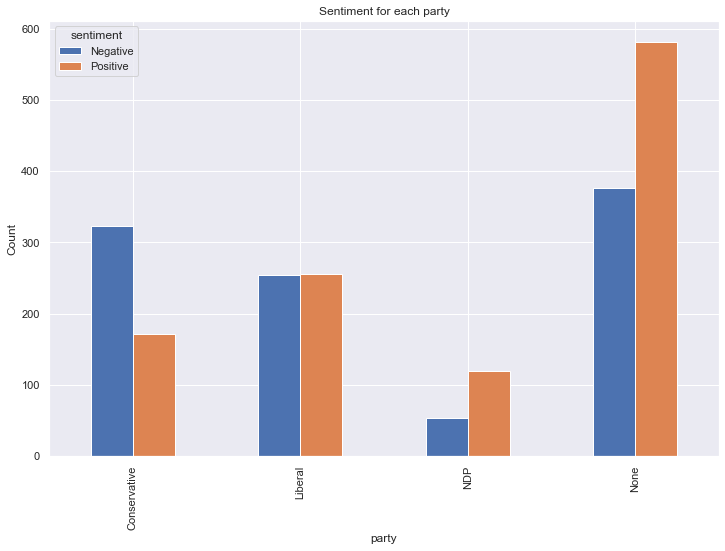

In [291]:
#plt.figure(figsize=(12,8));
pd.crosstab(elec['party'],elec['sentiment']).plot(kind='bar',figsize=(12,8));
plt.ylabel('Count');
plt.title('Sentiment for each party');

From the two graphs above, they have shown that Conservation parties have relative bad image to civilians. Liberal shared a neutral impression to public since the number of positive and negative are similar. Whereas for NDP, they are the only party that has way more positive tweets than negative ones. In another word, NDP post relatively a great image to the public. 

In [292]:
# elec['clean'][elec['clean'].str.contains(Liberal)].count()
# elec['clean'][elec['clean'].str.contains(Conservative)].count()
# elec['clean'][elec['clean'].str.contains(NDP)].count()

### Bonus plots

In [293]:
wc=WordCloud(max_words=300,width = 4000, height = 3000).generate(bow_sen)

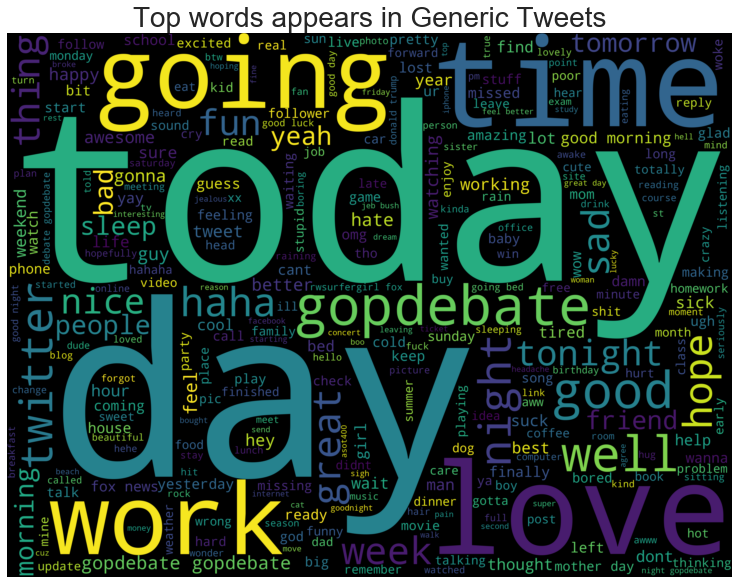

In [294]:
plt.figure(figsize=(20,10));
plt.imshow(wc, interpolation='bilinear');
plt.title('Top words appears in Generic Tweets',fontsize=28);
plt.axis("off");
plt.show();

In [295]:
wc=WordCloud(max_words=300,width = 4000, height = 3000).generate(bow_elec)

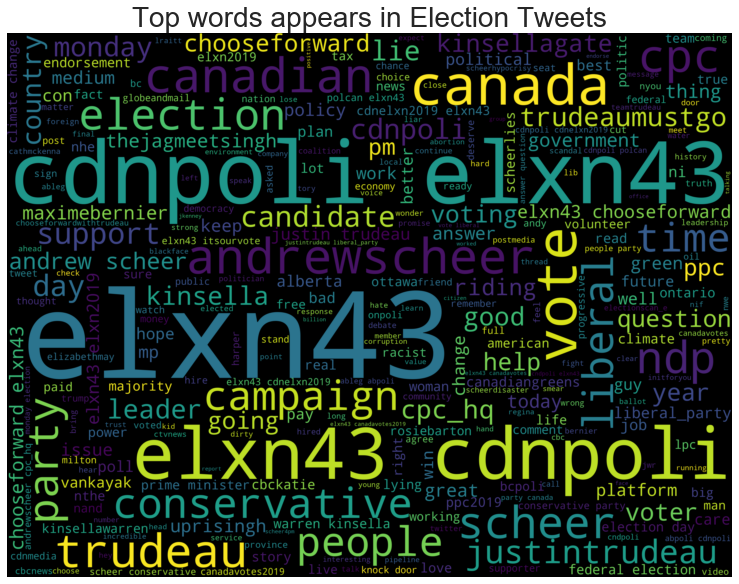

In [296]:
plt.figure(figsize=(20,10));
plt.imshow(wc, interpolation='bilinear');
plt.title('Top words appears in Election Tweets',fontsize=28);
plt.axis("off");
plt.show();

In [297]:
neg_reason=elec[elec['sentiment']=='Negative']['negative_reason'].value_counts()
neg_reason


Others                                 364
Scandal                                270
Tell lies                              198
Economy                                51 
Women Reproductive right and Racism    45 
Climate Problem                        41 
Separation                             16 
Privilege                              12 
Healthcare                             5  
Healthcare and Marijuana               4  
Name: negative_reason, dtype: int64

In [298]:
# fig = px.pie(neg_reason, values=neg_reason, names=neg_reason.index, title='Reasons for negative tweets')
# fig.show()
# plt.pie(neg_reason,labels=neg_reason.index,explode=(0.05,0.05,0.05,0.05,0.05, 0.05,0.05,0.05,0.05,0.05),\
#        labeldistance = 1.1,autopct = '%0.2f%%',shadow = True, startangle = 90,pctdistance = 1,radius=2.5);
# #plt.axis('equal')
# plt.legend(loc="best")
# plt.show();

In [299]:

fig = go.Figure(data=[go.Pie(labels=neg_reason.index, values=neg_reason, textinfo='label+percent',
                             insidetextorientation='radial',title='Reasons for negative tweets',pull=[0.1,0.05,0.05,0.05,0.05, 0.05,0.05,0.05,0.05,0.05])
                            ])
fig.show()

## Model preparation

Split the generic tweets from Sentiment.csv file randomly into training data (70%) and test data (30%). Prepare the data to try multiple classification algorithms (logistic regression, k-NN, Naive Bayes, SVM, decision trees, ensembles (Random Forest, XGBoost)), where each tweet is considered a single observation/example. In these models, the target variable is the sentiment value, which is either positive or negative. Try two different types of features, word frequency (WF) and TF-IDF.

In [300]:
sen.head();
elec.head();

Since only the positive and negative sentiments are being analyzed and the number of neutral sentiment is small, neutral sentiment will be removed as following. 

In [301]:
neutral=sen[sen['sentiment']=='Neutral']

In [302]:
sen=sen.drop(neutral.index)

In [303]:
# Check if neutral sentiment has been successfully removed
sen['sentiment'].unique()

array(['Positive', 'Negative'], dtype=object)

In [304]:
# Encode binary code for positive and negative class
sen['sentiment'].replace('Positive',1,inplace=True)
sen['sentiment'].replace('Negative',0,inplace=True)

elec['sentiment'].replace('Positive',1,inplace=True)
elec['sentiment'].replace('Negative',0,inplace=True)

In [305]:
#party=pd.get_dummies(elec['party'],prefix='party_')
#pd.concat([elec,party],axis=1).head()

In [306]:
X_sen=sen['clean']
y_sen=sen['sentiment']

In [307]:
x_train, x_test, y_train, y_test = train_test_split(X_sen, y_sen, test_size=0.3, random_state=3)

In [308]:
y_train=y_train.astype('int')

### Word Frequency Vectorizer

Word frequency for each word will be computed and be assigned to each unique word. It is a really simple and basic method to vectorize text data. But it is a good starting point. 

In [309]:
# Since the memory is limited, the top 1000 features will be used based on the sorting order of word frequency.
cv=CountVectorizer(max_features=1000)

In [310]:
x_traincv=cv.fit_transform(x_train)

In [311]:
x_testcv=cv.transform(x_test)

In [312]:
#Show vectorized matrix 
pd.DataFrame(x_traincv.toarray(), columns=cv.get_feature_names()).head()

,abortion,absolutely,account,ache,ad,add,admit,afraid,afternoon,age,...,yeah,year,yep,yesterday,yo,youtube,yr,yum,yummy,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF.IDF Vectorizer

There is limitation of Word Frequency especially when one frequent word appearing in every document will not contribute much to its overall distinctiveness. Thus, TFIDF will compensate for that issue.
Based on the definition from *'Natural Language Processing: Text Data Vectorization'* on *Medium* : <br><br>
TF-IDF stands for Term Frequency-Inverse Document Frequency which basically tells importance of the word in the corpus or dataset. TF-IDF contain two concept Term Frequency(TF) and Inverse Document Frequency(IDF) <br><br>
Term Frequency is defined as how frequently the word appear in the document or corpus. As each sentence is not the same length so it may be possible a word appears in long sentence occur more time as compared to word appear in sorter sentence.<br><br>
Inverse Document frequency is another concept which is used for finding out importance of the word. It is based on the fact that less frequent words are more informative and important.<br>
                                                        

In [313]:
tfidf=TfidfVectorizer(max_features=1000)

In [314]:
x_traintf=tfidf.fit_transform(x_train)
x_testtf=tfidf.transform(x_test)

In [315]:
pd.DataFrame(x_traintf.toarray(),columns=tfidf.get_feature_names()).head()

,abortion,absolutely,account,ache,ad,add,admit,afraid,afternoon,age,...,yeah,year,yep,yesterday,yo,youtube,yr,yum,yummy,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Models preparing

In [316]:
model_params = {
    
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            "C": [0.001,0.01,0.05,0.1,0.5,1,5,10,100],
            "solver" : ['newton-cg','lbfgs','liblinear','sag']
        }
    },
    
    'KNN': {
        'model': KNeighborsClassifier(n_jobs=-1),
        'params': {
            'n_neighbors':list(range(1,31)),
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    },
    
    'Naive Bayes' : {
        'model': MultinomialNB(),
        'params': {
            "alpha": [0,0.1,0.5,1,5,10,20,40,50,80,100]
        }
    },
    
    'svm': {
        'model': LinearSVC(dual=False),
        'params' : {
            #'gamma':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
            'C': [0.5,1,5,10,20,30,50],
            'penalty': ['l1','l2']
            #'kernel': ['rbf','linear']
        }  
    },
    
    'decision trees' : {
        'model': DecisionTreeClassifier(),
        'params': {
            "max_depth" : [None,2,5,8,10,15,20,30,40],
            "max_features"  : ["sqrt", "log2", "auto",None],
            "min_samples_split":[100,200,300,500,1000],
            "min_samples_leaf": [5,10,30,40,50,100]  
        }
    },
       
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1,5,10,50,100,200],
            'max_depth': [10,50,100,200,None],
            'min_samples_leaf':[1,2,5,10]
        }
    },
    
    'XGBoost' : {
        'model': XGBClassifier(),
        'params': {
            #"booster": ['gbtree', 'gblinear','dart'],
            "learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
            "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
            "min_child_weight" : [ 1, 3, 5, 7 ],
            "gamma" : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
            "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
        }
    },
    
}

## Model implementation

For data from Sentiment.csv file, train models on the training data, tune the hyperparameters (if necessary, with cross-validation) and apply the model to the test data to obtain an accuracy value. Evaluate the same model with best performance on the 2019 Canadian elections data. How well do your predictions match the sentiment labelled in the 2019 Canadian elections data? <br><br>
Choose the model that has the best performance and visualize the sentiment prediction results and the true sentiment for each of the 3 parties. Compare your modeling results with election outcome. Discuss whether NLP analytics based on tweets is useful for political parties during election campaigns.<br><br>
Split the negative 2019 Canadian elections tweets into training data (70%) and test data (30%). Use the sentiment labels in the 2019 Canadian elections data instead of your predictions from the previous part. Choose three algorithms from classification algorithms (logistic regression, k-NN, Naive Bayes, SVM, decision trees, ensembles (Random Forest, XGBoost)), train multi-class classification models to predict the reason for the negative tweets. There are 10 different negative reasons labelled in the dataset. Feel free to combine similar reasons into fewer categories as long as you justify your reasoning. You are free to define input features of your model using word frequency analysis or other techniques.

### Select model with WF and TFIDF and make prediction

#### Evaluate different models

Compute prediction accuarcy for each model as well. 

In [317]:
train=[x_traincv,x_traintf]
test=[x_testcv,x_testtf]
name=['Word Frequency','TFIDF']

for idx,train_data in enumerate(train):
    scores = []
    for model_name, mp in model_params.items():
        clf =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_iter=15)
        clf.fit(train_data, y_train)
        y_pred=clf.predict(test[idx])
        acc=accuracy_score(y_test,y_pred)
        scores.append({
            'model': model_name,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_,
            'prediction accuaracy': acc
        })
        print('This is model {}.'.format(model_name))
    print()    
    print('For feature with {},the results are:'.format(name[idx]))
    comp = pd.DataFrame(scores,columns=['model','best_score','best_params','prediction accuaracy'])
    comp

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=15, n_jobs=None,
                   param_distributions={'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5,
                                              10, 100],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag']}

This is model logistic_regression.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None, n_jobs=-1,
                                                  n_neighbors=5, p=2,
                                                  weights='uniform'),
                   iid='deprecated', n_iter=15, n_jobs=None,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
     

This is model KNN.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                           fit_prior=True),
                   iid='deprecated', n_iter=15, n_jobs=None,
                   param_distributions={'alpha': [0, 0.1, 0.5, 1, 5, 10, 20, 40,
                                                  50, 80, 100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

This is model Naive Bayes.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=1000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=None, tol=0.0001,
                                       verbose=0),
                   iid='deprecated', n_iter=15, n_jobs=None,
                   param_distributions={'C': [0.5, 1, 5, 10, 20, 30, 50],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

This is model svm.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

This is model decision trees.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

This is model random_forest.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           verbosity=None),
                   iid='deprecated', n_iter=15, n_jobs=None,
                   param_distributions={'colsample_bytree':

This is model XGBoost.

For feature with Word Frequency,the results are:


,model,best_score,best_params,prediction accuaracy
0,logistic_regression,0.713638,"{'solver': 'lbfgs', 'C': 0.5}",0.713502
1,KNN,0.669097,"{'n_neighbors': 30, 'algorithm': 'kd_tree'}",0.669014
2,Naive Bayes,0.698605,{'alpha': 0.5},0.698707
3,svm,0.713408,"{'penalty': 'l1', 'C': 0.5}",0.714089
4,decision trees,0.620567,"{'min_samples_split': 100, 'min_samples_leaf': 100, 'max_features': None, 'max_depth': 40}",0.621821
5,random_forest,0.710576,"{'n_estimators': 200, 'min_samples_leaf': 2, 'max_depth': None}",0.709829
6,XGBoost,0.709942,"{'min_child_weight': 5, 'max_depth': 15, 'learning_rate': 0.2, 'gamma': 0.4, 'colsample_bytree': 0.4}",0.710135


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=15, n_jobs=None,
                   param_distributions={'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5,
                                              10, 100],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag']}

This is model logistic_regression.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None, n_jobs=-1,
                                                  n_neighbors=5, p=2,
                                                  weights='uniform'),
                   iid='deprecated', n_iter=15, n_jobs=None,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
     

This is model KNN.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                           fit_prior=True),
                   iid='deprecated', n_iter=15, n_jobs=None,
                   param_distributions={'alpha': [0, 0.1, 0.5, 1, 5, 10, 20, 40,
                                                  50, 80, 100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

This is model Naive Bayes.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=1000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=None, tol=0.0001,
                                       verbose=0),
                   iid='deprecated', n_iter=15, n_jobs=None,
                   param_distributions={'C': [0.5, 1, 5, 10, 20, 30, 50],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

This is model svm.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

This is model decision trees.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

This is model random_forest.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           verbosity=None),
                   iid='deprecated', n_iter=15, n_jobs=None,
                   param_distributions={'colsample_bytree':

This is model XGBoost.

For feature with TFIDF,the results are:


,model,best_score,best_params,prediction accuaracy
0,logistic_regression,0.713856,"{'solver': 'lbfgs', 'C': 5}",0.713859
1,KNN,0.655300,"{'n_neighbors': 20, 'algorithm': 'auto'}",0.661871
2,Naive Bayes,0.701065,{'alpha': 10},0.702176
3,svm,0.713955,"{'penalty': 'l1', 'C': 0.5}",0.713859
4,decision trees,0.690438,"{'min_samples_split': 1000, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': None}",0.691054
5,random_forest,0.707373,"{'n_estimators': 200, 'min_samples_leaf': 10, 'max_depth': None}",0.707303
6,XGBoost,0.704049,"{'min_child_weight': 3, 'max_depth': 12, 'learning_rate': 0.3, 'gamma': 0.2, 'colsample_bytree': 0.7}",0.705620


According to the evaluation results, the top two models are logistic regression model and SVM model. Both gives similar cross validation score and testing accuracy. In this assignment, the logistic regression with the best parameters ['solver': 'sag', 'C': 1], which will be used as our best model to make prediction on 2019 Canadian Election Data. Moreover, tfidf will be selected for the later analysis due to its accuracy and robustness. 

#### Prediction on election data with the best model

Since sentiment analysis is conducted using generic tweets, the best model evaluated earlier with whole dataset of sentiment will be utilized directly on the Canadian Election Data. It is fair assumption because sentiment is determined by daily words expressing sentiment not by party names. 

In [318]:
#prepare 2019 Canadian Election Data
X_elec=elec['clean']
y_elec=elec['sentiment']

In [319]:
#tfidf2=TfidfVectorizer(max_features=1000)
x_elec_tfidf=tfidf.transform(X_elec)
x_sen_tfidf=tfidf.transform(X_sen)

In [320]:
# Make prediction using the best model with tuned hyperparameters above.
clf=LogisticRegression(multi_class='auto',solver='sag',C=1)
clf.fit(x_sen_tfidf,y_sen)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [321]:
y_pred=clf.predict(x_elec_tfidf)
print('Prediction accuracy on election data is:{}.'.format(accuracy_score(y_elec,y_pred)))

Prediction accuracy on election data is:0.5864978902953587.


It is shown above that the prediction accuracy drops from 70 percent to 58 percent. The drop in accuracy is expected since the model is not seen any of this new set of election data. More specifically, people may use some different vocabularies to express their sentiment in political related topics. As a result, the original model did not capture enough data of expressing sentiment towards politic parties. 

In [322]:
### Alternative Checking 
# xgb=XGBClassifier(min_child_weight=5, max_depth=15, learning_rate=0.3, gamma=0.1, colsample_bytree=0.4)
# xgb.fit(x_sen_tfidf,y_sen)
# y_pred_xgb=xgb.predict(x_elec_tfidf)
# print('Prediction accuracy on election data is:{}.'.format(accuracy_score(y_elec,y_pred_xgb)))

### Visualization of the sentiment prediction results for 3 parties

In [323]:
prediction=pd.Series(y_pred,name='sent_pred')
elec=pd.concat([elec,prediction],axis=1)
elec.head()

,sentiment,negative_reason,text,clean,word_length,charc_length,party,sent_pred
0,0,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, how about we agree that #Canadian #women can not and should not trust that #AndrewScheer and a #Conservatives government will protect a woman's right to have automony over her body. Let's go with that. #cdnpoli #elxn43 #Canada #abortion""",rosiebarton suggestion agree canadian woman trust andrewscheer conservative government protect woman automony body cdnpoli elxn43 canada abortion,17,145,Conservative,0
1,1,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Station \n#EtobicokeNorth #CityofTO #ONPoli #cdnpoli #elxn43 https://t.co/wgdXLksTbQ""",allwomanspacewalk real space_station etobicokenorth cityofto onpoli cdnpoli elxn43,8,82,None,1
2,0,Economy,"b""#Brantford It's going to cost YOU $94 BILLION FOR THE NEXT 4 YEARS! ASK JUSTIN! #elxn43 #cdnpoli #Canada https://t.co/9DTLLd9972""",brantford going cost billion year justin elxn43 cdnpoli canada,9,64,Liberal,0
3,1,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#elxn43 \n\nCan't decide? This should help!\n\nhttps://t.co/UNe5J1tDJ6""",canada canadaelection2019 canadavotes elxn43 ncan decide help,7,61,None,0
4,0,Economy,"b""#Canada #taxpayers are sick &amp; tired of having their hard earned $ donated to corporate welfare bums that don't need it! This is only one of many reasons #TrudeauMustGo. @SNCLavalin can leave #Canada for all I care. @Sheila_Copps #SNCLavalinScandal #Election2019 #elxn43 #cdnpoli https://t.co/ywD7MAByKk""",canada taxpayer sick tired hard earned donated corporate welfare bum reason trudeaumustgo snclavalin leave canada care sheila_copps snclavalinscandal election2019 elxn43 cdnpoli,21,177,Liberal,0


In [324]:
three_parties=elec[elec.party!='None']
three_parties.head()

,sentiment,negative_reason,text,clean,word_length,charc_length,party,sent_pred
0,0,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, how about we agree that #Canadian #women can not and should not trust that #AndrewScheer and a #Conservatives government will protect a woman's right to have automony over her body. Let's go with that. #cdnpoli #elxn43 #Canada #abortion""",rosiebarton suggestion agree canadian woman trust andrewscheer conservative government protect woman automony body cdnpoli elxn43 canada abortion,17,145,Conservative,0
2,0,Economy,"b""#Brantford It's going to cost YOU $94 BILLION FOR THE NEXT 4 YEARS! ASK JUSTIN! #elxn43 #cdnpoli #Canada https://t.co/9DTLLd9972""",brantford going cost billion year justin elxn43 cdnpoli canada,9,64,Liberal,0
4,0,Economy,"b""#Canada #taxpayers are sick &amp; tired of having their hard earned $ donated to corporate welfare bums that don't need it! This is only one of many reasons #TrudeauMustGo. @SNCLavalin can leave #Canada for all I care. @Sheila_Copps #SNCLavalinScandal #Election2019 #elxn43 #cdnpoli https://t.co/ywD7MAByKk""",canada taxpayer sick tired hard earned donated corporate welfare bum reason trudeaumustgo snclavalin leave canada care sheila_copps snclavalinscandal election2019 elxn43 cdnpoli,21,177,Liberal,0
5,0,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - #BlastFromThePast - In 2012 #Conservatives introduced the end of the long-gun registry even though all heads of police across Canada and victims' groups objected for crime control and public safety! #GunLobby https://t.co/WgZKMSQ4wa""",canadavotes2019 elxn43 cdnpoli fact blastfromthepast conservative introduced long gun registry head police canada victim group objected crime control public safety gunlobby,21,173,Conservative,0
7,1,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than double what was promised in 2015, to the national debt. Now for the next term - if re-elected, they're forecasting $90 billion. This is w/out a national pharmacare program incl and w/out an NDP coalition. $180 billion seems possible imo.""",cdnpoli elxn43 liberal double promised national debt term elected forecasting billion national pharmacare program incl ndp coalition billion imo,19,147,Liberal,1


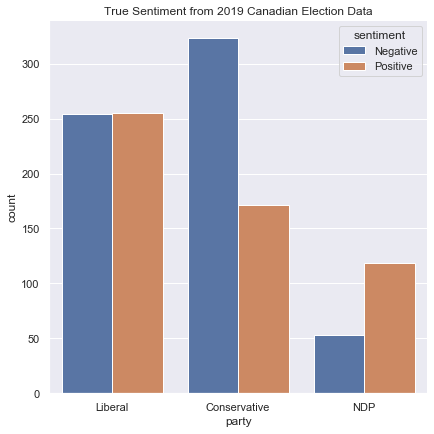

In [325]:
sns.catplot(x="party",hue='sentiment',
                data=three_parties, kind="count",
                height=6, aspect=1,order=three_parties['party'].value_counts().index,legend=False);
plt.legend(title='sentiment', loc='upper right', labels=['Negative', 'Positive'])
plt.title('True Sentiment from 2019 Canadian Election Data');

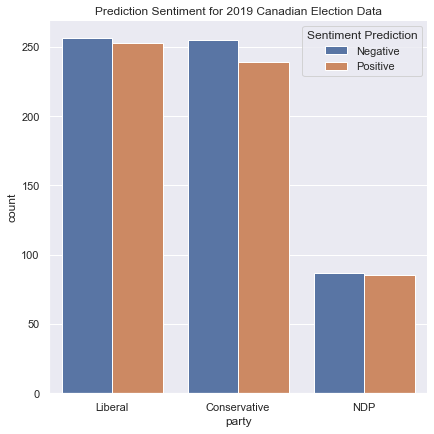

In [326]:
sns.catplot(x="party", hue="sent_pred",
                data=three_parties, kind="count",
                height=6, aspect=1,order=three_parties['party'].value_counts().index,legend=False);
plt.legend(title='Sentiment Prediction', loc='upper right', labels=['Negative', 'Positive']);
plt.title('Prediction Sentiment for 2019 Canadian Election Data');

This model did not perfectly predict the results, however, it roughly indicates the correct distribution for different parties. The result of 2019 Canadian Election is that liberal won the election and Conservative party and NDP both lost despite of the more positive reviews for NDP. It turns out that even people probably criticize on one party, at the same time, the party will attract more attention after all. From the sentiment results, NDP posed a positive impression overall, but they failed to receive enough attention which converted into votes eventually. Therefore, based on both predicted and true sentiment results, it is confident to say that, for NDP analytics, those tweets were not sufficient enough to tell them they were doing a competent job to beat other parties. 

### Negative Reasons Prediction

In [327]:
# Collect all the negative tweets
elec_neg=elec[elec['sentiment']==0]
elec_neg.head()

,sentiment,negative_reason,text,clean,word_length,charc_length,party,sent_pred
0,0,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, how about we agree that #Canadian #women can not and should not trust that #AndrewScheer and a #Conservatives government will protect a woman's right to have automony over her body. Let's go with that. #cdnpoli #elxn43 #Canada #abortion""",rosiebarton suggestion agree canadian woman trust andrewscheer conservative government protect woman automony body cdnpoli elxn43 canada abortion,17,145,Conservative,0
2,0,Economy,"b""#Brantford It's going to cost YOU $94 BILLION FOR THE NEXT 4 YEARS! ASK JUSTIN! #elxn43 #cdnpoli #Canada https://t.co/9DTLLd9972""",brantford going cost billion year justin elxn43 cdnpoli canada,9,64,Liberal,0
4,0,Economy,"b""#Canada #taxpayers are sick &amp; tired of having their hard earned $ donated to corporate welfare bums that don't need it! This is only one of many reasons #TrudeauMustGo. @SNCLavalin can leave #Canada for all I care. @Sheila_Copps #SNCLavalinScandal #Election2019 #elxn43 #cdnpoli https://t.co/ywD7MAByKk""",canada taxpayer sick tired hard earned donated corporate welfare bum reason trudeaumustgo snclavalin leave canada care sheila_copps snclavalinscandal election2019 elxn43 cdnpoli,21,177,Liberal,0
5,0,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - #BlastFromThePast - In 2012 #Conservatives introduced the end of the long-gun registry even though all heads of police across Canada and victims' groups objected for crime control and public safety! #GunLobby https://t.co/WgZKMSQ4wa""",canadavotes2019 elxn43 cdnpoli fact blastfromthepast conservative introduced long gun registry head police canada victim group objected crime control public safety gunlobby,21,173,Conservative,0
8,0,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don't Make America's Mistakes | Full Frontal on TBS https://t.co/PhU4jHxnMF via @YouTube""",chooseforward cdnpoli elxn43 ncanada america mistake full frontal tb youtube,10,76,Liberal,0


Similar reasons can be grouped together. 'Tell lies' is one of reasons of scandal. 'Healthcare and Marijuana' will be combined with 'Healthcare' as well. 

In [328]:
# Group similar negative reasons 
elec_neg['negative_reason'].replace('Healthcare','Healthcare and Marijuana',inplace=True)
elec_neg['negative_reason'].replace('Tell lies','Scandal',inplace=True)

In [329]:
elec_neg.negative_reason=elec_neg.negative_reason.astype('category')

In [330]:
# Target encode dictionary
code_ref=dict(enumerate(elec_neg.negative_reason.cat.categories))
code_ref

{0: 'Climate Problem',
 1: 'Economy',
 2: 'Healthcare and Marijuana',
 3: 'Others',
 4: 'Privilege',
 5: 'Scandal',
 6: 'Separation',
 7: 'Women Reproductive right and Racism'}

In [331]:
elec_neg.negative_reason=elec_neg.negative_reason.astype('category').cat.codes

In [332]:
elec_neg.head()

,sentiment,negative_reason,text,clean,word_length,charc_length,party,sent_pred
0,0,7,"b""@RosieBarton So instead of your suggestion, how about we agree that #Canadian #women can not and should not trust that #AndrewScheer and a #Conservatives government will protect a woman's right to have automony over her body. Let's go with that. #cdnpoli #elxn43 #Canada #abortion""",rosiebarton suggestion agree canadian woman trust andrewscheer conservative government protect woman automony body cdnpoli elxn43 canada abortion,17,145,Conservative,0
2,0,1,"b""#Brantford It's going to cost YOU $94 BILLION FOR THE NEXT 4 YEARS! ASK JUSTIN! #elxn43 #cdnpoli #Canada https://t.co/9DTLLd9972""",brantford going cost billion year justin elxn43 cdnpoli canada,9,64,Liberal,0
4,0,1,"b""#Canada #taxpayers are sick &amp; tired of having their hard earned $ donated to corporate welfare bums that don't need it! This is only one of many reasons #TrudeauMustGo. @SNCLavalin can leave #Canada for all I care. @Sheila_Copps #SNCLavalinScandal #Election2019 #elxn43 #cdnpoli https://t.co/ywD7MAByKk""",canada taxpayer sick tired hard earned donated corporate welfare bum reason trudeaumustgo snclavalin leave canada care sheila_copps snclavalinscandal election2019 elxn43 cdnpoli,21,177,Liberal,0
5,0,3,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - #BlastFromThePast - In 2012 #Conservatives introduced the end of the long-gun registry even though all heads of police across Canada and victims' groups objected for crime control and public safety! #GunLobby https://t.co/WgZKMSQ4wa""",canadavotes2019 elxn43 cdnpoli fact blastfromthepast conservative introduced long gun registry head police canada victim group objected crime control public safety gunlobby,21,173,Conservative,0
8,0,3,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don't Make America's Mistakes | Full Frontal on TBS https://t.co/PhU4jHxnMF via @YouTube""",chooseforward cdnpoli elxn43 ncanada america mistake full frontal tb youtube,10,76,Liberal,0


In [333]:
X_neg=elec_neg['clean']
y_neg=elec_neg['negative_reason']

In [334]:
x_neg_train, x_neg_test, y_neg_train, y_neg_test = train_test_split(X_neg, y_neg, test_size=0.3, random_state=3)

In [335]:
# Use tfidf to vectorize words
tfidf3=TfidfVectorizer(max_features=2000,ngram_range=(1,2))
x_train_neg=tfidf3.fit_transform(x_neg_train)
x_test_neg=tfidf3.transform(x_neg_test)

In [336]:
scores = []
for model_name, mp in model_params.items():
    clf =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_iter=15)
    clf.fit(x_train_neg, y_neg_train)
    y_pred=clf.predict(x_test_neg)
    acc=accuracy_score(y_neg_test,y_pred)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'prediction accuaracy': acc
    })
    print('This is model {}.'.format(model_name))
print()    
print('For feature with {},the results are:'.format(name[idx]))
comp = pd.DataFrame(scores,columns=['model','best_score','best_params','prediction accuaracy'])
comp

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=15, n_jobs=None,
                   param_distributions={'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5,
                                              10, 100],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag']}

This is model logistic_regression.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None, n_jobs=-1,
                                                  n_neighbors=5, p=2,
                                                  weights='uniform'),
                   iid='deprecated', n_iter=15, n_jobs=None,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
     

This is model KNN.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                           fit_prior=True),
                   iid='deprecated', n_iter=15, n_jobs=None,
                   param_distributions={'alpha': [0, 0.1, 0.5, 1, 5, 10, 20, 40,
                                                  50, 80, 100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

This is model Naive Bayes.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=1000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=None, tol=0.0001,
                                       verbose=0),
                   iid='deprecated', n_iter=15, n_jobs=None,
                   param_distributions={'C': [0.5, 1, 5, 10, 20, 30, 50],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

This is model svm.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

This is model decision trees.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

This is model random_forest.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           verbosity=None),
                   iid='deprecated', n_iter=15, n_jobs=None,
                   param_distributions={'colsample_bytree':

This is model XGBoost.

For feature with TFIDF,the results are:


,model,best_score,best_params,prediction accuaracy
0,logistic_regression,0.573769,"{'solver': 'lbfgs', 'C': 10}",0.582781
1,KNN,0.551125,"{'n_neighbors': 20, 'algorithm': 'auto'}",0.546358
2,Naive Bayes,0.563891,{'alpha': 0.1},0.586093
3,svm,0.616424,"{'penalty': 'l1', 'C': 1}",0.649007
4,decision trees,0.544053,"{'min_samples_split': 300, 'min_samples_leaf': 10, 'max_features': None, 'max_depth': 10}",0.572848
5,random_forest,0.598004,"{'n_estimators': 100, 'min_samples_leaf': 1, 'max_depth': 50}",0.576159
6,XGBoost,0.576738,"{'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.15, 'gamma': 0.4, 'colsample_bytree': 0.4}",0.586093


Based on the results comparing 7 models above, the top model performing outstandingly is SVM with hyperparameters {'penalty': 'l1', 'C': 1} providing the best cross validation score, which makes prediction on the test data with accuracy of 64.9%.

In [337]:
best_clf=LinearSVC(dual=False, penalty='l1', C=1)

In [338]:
best_clf.fit(x_train_neg, y_neg_train)

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
          verbose=0)

In [377]:
# Organization of data needed for visualization 
reason_true=pd.Series(y_neg_test,name='reason_true').reset_index(drop=True)
reason_pred=pd.Series(best_clf.predict(x_test_neg),name='reason_pred')
compar=pd.concat([reason_true,reason_pred],axis=1)

In [375]:
# Transformation of data into convenient form
table=pd.melt(compar)
table_new=table.rename(columns={'variable':'Scenario','value':'Negative reason'})

[Text(0, 0, 'Climate Problem'),
 Text(0, 0, 'Economy'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Privilege'),
 Text(0, 0, 'Scandal'),
 Text(0, 0, 'Separation'),
 Text(0, 0, 'Women Reproductive right and Racism')]

Text(0.5, 1.0, 'Negative reasons distribution for true and predicted scenarios')

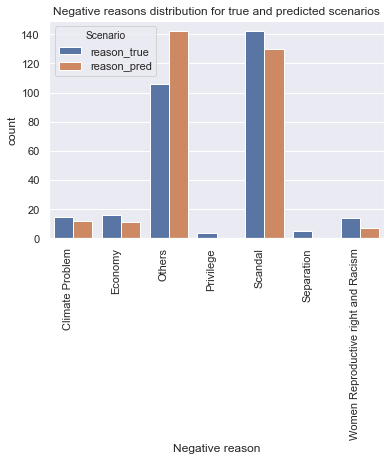

In [376]:
ax=sns.countplot(x="Negative reason", hue="Scenario", data=table_new)
ax.set_xticklabels(list(map(code_ref.get,compar['reason_true'].value_counts().sort_index().index)),rotation=90, horizontalalignment='right')
plt.title('Negative reasons distribution for true and predicted scenarios')

From the graph shown above, the prediction did not perform well on the categories with few samples due to its nature of imbalanced data (more details in section 5), however, the prediction follows well the general distribution of negative reasons overall.  

## Results

Answer the research question stated above based on the outputs of your first model. Describe the results of the analysis and discuss your interpretation of the results. Explain how each party is viewed in the public eye based on the sentiment value. For the second model, based on the model that worked best, provide a few reasons why your model may fail to predict the correct negative reasons. Back up your reasoning with examples from the test sets. For both models, suggest one way you can improve the accuracy of your models.

### Results interpretation from the first model--Sentiment Prediction

Recap what sentiment are for both true sentiment and predicted sentiment. 

In [342]:
three_parties.head()

,sentiment,negative_reason,text,clean,word_length,charc_length,party,sent_pred
0,0,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, how about we agree that #Canadian #women can not and should not trust that #AndrewScheer and a #Conservatives government will protect a woman's right to have automony over her body. Let's go with that. #cdnpoli #elxn43 #Canada #abortion""",rosiebarton suggestion agree canadian woman trust andrewscheer conservative government protect woman automony body cdnpoli elxn43 canada abortion,17,145,Conservative,0
2,0,Economy,"b""#Brantford It's going to cost YOU $94 BILLION FOR THE NEXT 4 YEARS! ASK JUSTIN! #elxn43 #cdnpoli #Canada https://t.co/9DTLLd9972""",brantford going cost billion year justin elxn43 cdnpoli canada,9,64,Liberal,0
4,0,Economy,"b""#Canada #taxpayers are sick &amp; tired of having their hard earned $ donated to corporate welfare bums that don't need it! This is only one of many reasons #TrudeauMustGo. @SNCLavalin can leave #Canada for all I care. @Sheila_Copps #SNCLavalinScandal #Election2019 #elxn43 #cdnpoli https://t.co/ywD7MAByKk""",canada taxpayer sick tired hard earned donated corporate welfare bum reason trudeaumustgo snclavalin leave canada care sheila_copps snclavalinscandal election2019 elxn43 cdnpoli,21,177,Liberal,0
5,0,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - #BlastFromThePast - In 2012 #Conservatives introduced the end of the long-gun registry even though all heads of police across Canada and victims' groups objected for crime control and public safety! #GunLobby https://t.co/WgZKMSQ4wa""",canadavotes2019 elxn43 cdnpoli fact blastfromthepast conservative introduced long gun registry head police canada victim group objected crime control public safety gunlobby,21,173,Conservative,0
7,1,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than double what was promised in 2015, to the national debt. Now for the next term - if re-elected, they're forecasting $90 billion. This is w/out a national pharmacare program incl and w/out an NDP coalition. $180 billion seems possible imo.""",cdnpoli elxn43 liberal double promised national debt term elected forecasting billion national pharmacare program incl ndp coalition billion imo,19,147,Liberal,1


In [343]:
party_sen_cnt=three_parties.groupby('party')['sentiment'].value_counts().unstack()
party_sen_cnt.rename(columns={0:'Negative',1:'Positive'},inplace=True)

In [344]:
party_sen_cnt.iplot(kind='bar',barmode='stack', title='True sentiment from 2019 Canadian Election data',\
                    xTitle='Party',yTitle='Count',showlegend=True)


In [345]:
# Predicted sentiment for election data
party_pred_cnt=three_parties.groupby('party')['sent_pred'].value_counts().unstack()
party_pred_cnt.rename(columns={0:'Negative',1:'Positive'},inplace=True)
party_pred_cnt.iplot(kind='bar',barmode='stack', title='Predicted sentiment from 2019 Canadian Election data',\
                    xTitle='Party',yTitle='Count',showlegend=True)


From the graphs above, it shows that Liberal and Conservative parties receive the most attention whereas NDP did not attract enough amount of supporters relatively. However, NDP shared a positive impression to the public according to the tweets sentiment analysis. On the other hand, Conservative shared a more of negative image to public comparing to other parties. Liberal party attract the most attention with 50 % positive and 50 % negative comments. As seen from the result of 2019 election, Liberal won the election with 157 elected seats and 33% population vote. Conservation gained 121 elected seats with 34% population vote. NDP received 24 elected seats with 16% population vote. Interestingly, the distribution of the results roughly follows the distribution of number of tweets for different parties. In concludes that positive reviews may not necessarily enough to win an election. Being the most prevailing party is the key. 

### Results interpretation from the second model--Negative Reasons Prediction

In [346]:
elec_neg.head()

,sentiment,negative_reason,text,clean,word_length,charc_length,party,sent_pred
0,0,7,"b""@RosieBarton So instead of your suggestion, how about we agree that #Canadian #women can not and should not trust that #AndrewScheer and a #Conservatives government will protect a woman's right to have automony over her body. Let's go with that. #cdnpoli #elxn43 #Canada #abortion""",rosiebarton suggestion agree canadian woman trust andrewscheer conservative government protect woman automony body cdnpoli elxn43 canada abortion,17,145,Conservative,0
2,0,1,"b""#Brantford It's going to cost YOU $94 BILLION FOR THE NEXT 4 YEARS! ASK JUSTIN! #elxn43 #cdnpoli #Canada https://t.co/9DTLLd9972""",brantford going cost billion year justin elxn43 cdnpoli canada,9,64,Liberal,0
4,0,1,"b""#Canada #taxpayers are sick &amp; tired of having their hard earned $ donated to corporate welfare bums that don't need it! This is only one of many reasons #TrudeauMustGo. @SNCLavalin can leave #Canada for all I care. @Sheila_Copps #SNCLavalinScandal #Election2019 #elxn43 #cdnpoli https://t.co/ywD7MAByKk""",canada taxpayer sick tired hard earned donated corporate welfare bum reason trudeaumustgo snclavalin leave canada care sheila_copps snclavalinscandal election2019 elxn43 cdnpoli,21,177,Liberal,0
5,0,3,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - #BlastFromThePast - In 2012 #Conservatives introduced the end of the long-gun registry even though all heads of police across Canada and victims' groups objected for crime control and public safety! #GunLobby https://t.co/WgZKMSQ4wa""",canadavotes2019 elxn43 cdnpoli fact blastfromthepast conservative introduced long gun registry head police canada victim group objected crime control public safety gunlobby,21,173,Conservative,0
8,0,3,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don't Make America's Mistakes | Full Frontal on TBS https://t.co/PhU4jHxnMF via @YouTube""",chooseforward cdnpoli elxn43 ncanada america mistake full frontal tb youtube,10,76,Liberal,0


In [347]:
#y_neg_train.value_counts()
#y_neg_test.value_counts()


In [348]:
# Preparing meaningful xlabel
neg_code_train=y_neg_train.value_counts().index
neg_label_train=list(map(code_ref.get,neg_code_train))
neg_code_test=y_neg_test.value_counts().index
neg_label_test=list(map(code_ref.get,neg_code_test))

In [349]:
fig = go.Figure();

fig = go.Figure(data=[
    go.Bar(name='Train data', x=neg_label_train, y=y_neg_train.value_counts()),
    go.Bar(name='Test data', x=neg_label_test, y=y_neg_test.value_counts()),
    
]);
# fig.add_trace(go.Bar(
#     x=y_neg_train.value_counts().index,
#     y=y_neg_train.value_counts(),
#     name='Train data',
#     marker_color='indianred'
# ))
# fig.add_trace(go.Bar(
#     x=y_neg_test.value_counts().index,
#     y=y_neg_test.value_counts(),
#     name='Test data',
#     marker_color='lightsalmon'
# ))

fig.update_layout(
    title='Frequency of Different Negarive Reasons ',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Frequency',
        titlefont_size=16,
        tickfont_size=14,
    ),
    xaxis=dict(
        title='Negative Reasons',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)

fig.show()

From the graph above, it is clearly seen that the data is imbalanced that the samples associated with scandal or other reasons are way more than the other categories. That causes the classifier to put more weight on these categories and ignore those categories with few samples. Thus, the accuracy of prediction would drop accordingly. Another reason is that some of the categories are overlapped with each other (e.g. scandal and other reasons) or more categories exist in single tweet. Those would also impede classifier from predicting correctly as shown blew in the confusion matrix. 

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'Tweets Negative Reason Predictions')

<Figure size 864x864 with 0 Axes>

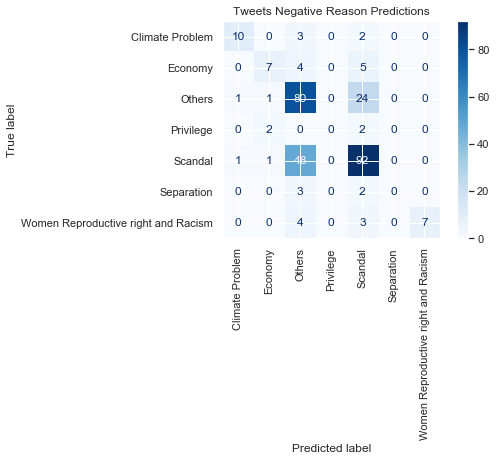

In [350]:
label=list(map(code_ref.get,y_neg_test.value_counts().sort_index().index))
plt.figure(figsize=(12,12))
classifier=LinearSVC(dual=False, penalty= 'l1', C=1).fit(x_train_neg, y_neg_train)
plot_confusion_matrix(classifier, x_test_neg, y_neg_test, cmap=plt.cm.Blues,display_labels=label,\
                     xticks_rotation='vertical')
plt.title('Tweets Negative Reason Predictions')
plt.show()


### Possible improvement for both models

For the first binary classification model, texts can be vectorized with word embedding method such as Word2vec and GloVe which takes into account more of word meaning and sequence than just frequency. For the second multi-class classification model, one way to improve accuracy is to resample data in order to make the sample balanced before training. There are several methods to do so including oversampling, undersampling, generating synthetic data etc. On top on that, both models can be improved by feature engineering including constructing meaningful feautures and removing non-important features. 

## Bonus--Neural Network with word embedding 

Use neural network to make sentiment analysis on the binary classification problem.

In [351]:
sen.head()
X=sen['text']
y=sen['sentiment']

,sentiment,text,clean,word_length,charc_length
0,1,"RT @Diplomtc_Immnty: @realDonaldTrump They tried to take you out &amp; your poll numbers skyrocketed. Voters matter, not @FOXNews moderators.\n#â€¦",diplomtc_immnty realdonaldtrump poll number skyrocketed voter matter foxnews moderator,9,86
1,0,"@chiefy74 Damn i'm jealous, i wanna watch the fight i love ufc just no one knows.",chiefy74 damn jealous wanna watch fight love ufc,8,48
2,1,I'm listening The Beatles now. They're great,listening beatles great,3,23
3,1,"@ddlovato could i please get a shout out or anything, i'm a huge fan, i can't wait for your new cd",ddlovato shout huge fan wait cd,6,31
4,1,@salspizza just spotted ur message there Tony and have replied,salspizza spotted ur message tony replied,6,41


In [352]:
number_of_most_frequent_words=100000
max_len=50

In [353]:
# integer encode the documents
vocab_size = 100000
X_encoded= X.apply(lambda x:one_hot(str(x),vocab_size))
print(X_encoded)

0         [9785, 24933, 52045, 51239, 97527, 34539, 78451, 67495, 89649, 92392, 18636, 283, 79215, 47708, 50855, 31118, 49965, 49549, 6515, 77124, 56695]                            
1         [99677, 94009, 76781, 84991, 55683, 88058, 91929, 79926, 91878, 55683, 87007, 58546, 21247, 71653, 16512, 95250]                                                           
2         [76781, 81146, 79926, 42969, 66828, 88122, 26105]                                                                                                                          
3         [95466, 438, 55683, 62418, 37767, 15228, 95699, 92392, 41344, 91191, 76781, 15228, 58231, 77317, 55683, 9460, 3508, 33283, 283, 73079, 66639]                              
4         [26930, 21247, 49969, 69909, 50626, 8034, 10151, 48935, 24490, 27463]                                                                                                      
                                          ...                                             

In [354]:
x_train, x_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=3)

In [355]:
# Pad document to the same length
x_train = pad_sequences(x_train,maxlen=max_len,padding='post' )
x_test = pad_sequences(x_test, maxlen=max_len, padding='post')

In [356]:
# Create neural network
model = Sequential()
model.add(Embedding(input_dim=number_of_most_frequent_words, output_dim=128, input_length=max_len))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [357]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 128)           12800000  
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [358]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [359]:
result= model.fit(x_train, y_train, batch_size=5000, epochs=50, validation_data=(x_test, y_test))

Train on 91468 samples, validate on 39201 samples
Epoch 1/50
91468/91468 [==============================] - 159s 2ms/step - loss: 0.6895 - accuracy: 0.5435 - val_loss: 0.6886 - val_accuracy: 0.5478
Epoch 2/50
91468/91468 [==============================] - 153s 2ms/step - loss: 0.6891 - accuracy: 0.5461 - val_loss: 0.6886 - val_accuracy: 0.5478
Epoch 3/50
91468/91468 [==============================] - 158s 2ms/step - loss: 0.6891 - accuracy: 0.5461 - val_loss: 0.6885 - val_accuracy: 0.5478
Epoch 4/50
91468/91468 [==============================] - 153s 2ms/step - loss: 0.6808 - accuracy: 0.5631 - val_loss: 0.6266 - val_accuracy: 0.6854
Epoch 5/50
91468/91468 [==============================] - 154s 2ms/step - loss: 0.5834 - accuracy: 0.7217 - val_loss: 0.5302 - val_accuracy: 0.7495
Epoch 6/50
91468/91468 [==============================] - 153s 2ms/step - loss: 0.4779 - accuracy: 0.8029 - val_loss: 0.4925 - val_accuracy: 0.7708
Epoch 7/50
91468/91468 [==============================] - 153s

In [360]:
score, accu= model.evaluate(x_test, y_test, batch_size=5000)
print('The test accuracy is {:.2%}.'.format(accu))

39201/39201 [==============================] - 18s 447us/step
The test accuracy is 73.70%.


**So far, recursive neural network gives higher accuracy (73%) on testing data comparing to the best model earlier (71%) even though raw data has been inputted into embedding layer within the neural network model.**

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Model loss')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

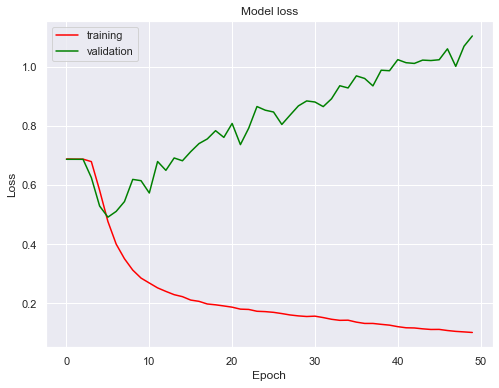

In [361]:
#plot loss
plt.figure(figsize=(8,6))
plt.plot(result.epoch,result.history['loss'], label='training', color='red')
plt.plot(result.epoch,result.history['val_loss'], label='validation', color='green')
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend() 
plt.show()


<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Model accuracy')

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

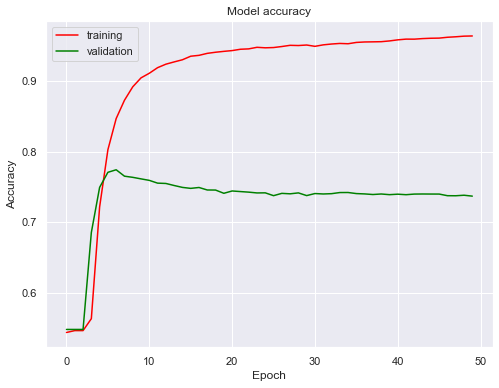

In [362]:
#plot accuracy
plt.figure(figsize=(8,6))
plt.plot(result.epoch,result.history['accuracy'], label='training', color='red')
plt.plot(result.epoch,result.history['val_accuracy'], label='validation', color='green')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

**From the loss and accuracy plots above, after about 7 epochs, the accuracy of neutral network model stops increasing and validation loss has been increasing dramatically. Then the model starts to overfit after this point. Therefore, the optimal epoch is around 7.**